# ohlcv

In [1]:
import vectorbt as vbt

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from numba import njit

In [3]:
print(vbt.settings.ohlcv['column_names'])

{'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}


In [4]:
try:
    pd.DataFrame([1, 2, 3]).vbt.ohlcv.plot()
except Exception as e:
    print(e) # couldn't find default column names

'Open'


In [5]:
ohlcv_ts = pd.DataFrame({
    'open': [1, 2, 3], 
    'high': [1, 2, 3], 
    'low': [1, 2, 3], 
    'close': [1, 2, 3], 
    'volume': [1, 2, 3]
})

In [6]:
ohlcv_ts = pd.DataFrame(
    columns=['open', 'high', 'low', 'close', 'volume'],
    index=[datetime(2018, 1, 1) + timedelta(days=i) for i in range(10)]
)
ohlcv_ts['open'] = np.cumsum(np.random.uniform(-0.8, 1, size=(10,)))
ohlcv_ts['close'] = ohlcv_ts['open'] + np.random.uniform(-1, 1, size=(10,))
ohlcv_ts['high'] = ohlcv_ts['open'] + np.random.uniform(0, 1, size=(10,))
ohlcv_ts['low'] = ohlcv_ts['open'] - np.random.uniform(0, 1, size=(10,))
ohlcv_ts['volume'] = np.cumsum(np.random.uniform(-1, 1, size=(10,)))

print(ohlcv_ts)

                open      high       low     close    volume
2018-01-01 -0.378425 -0.166065 -0.536116 -0.911082  0.197915
2018-01-02 -0.796728 -0.767343 -0.944759 -0.641530 -0.781948
2018-01-03 -0.293939  0.470779 -0.827735 -0.041355 -0.164156
2018-01-04 -0.631912 -0.427544 -1.305135 -0.540248 -0.902142
2018-01-05 -1.109978 -1.072251 -1.365781 -1.613582 -1.818045
2018-01-06 -0.232050  0.086939 -0.288361  0.438538 -2.745279
2018-01-07 -0.132129  0.382496 -0.980730 -1.032295 -3.491668
2018-01-08 -0.596032 -0.010477 -0.691928 -1.481406 -2.831959
2018-01-09 -0.345234 -0.202666 -0.902126 -1.247913 -3.471086
2018-01-10 -0.230200  0.251079 -0.577828  0.641814 -3.265848


In [7]:
try:
    ohlcv_ts.vbt.ohlcv.plot()
except Exception as e:
    print(e) # still couldn't find default column names

'Open'


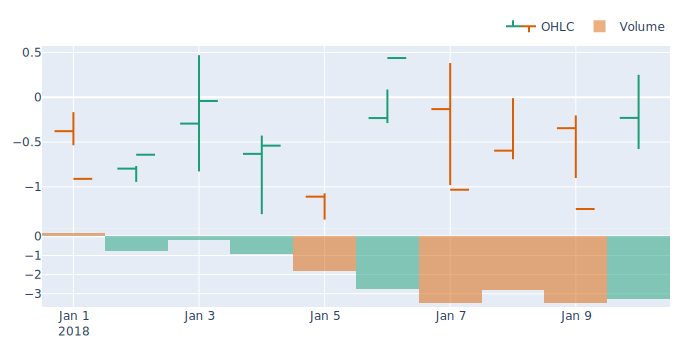

In [8]:
# Specify them manually
ohlcv_ts.vbt.ohlcv(column_names={
    'open': 'open', 
    'high': 'high', 
    'low': 'low', 
    'close': 'close', 
    'volume': 'volume'
}).plot().show_svg()

In [9]:
# Or by changing the defaults
vbt.settings.ohlcv['column_names'] = {
    'open': 'open', 
    'high': 'high', 
    'low': 'low', 
    'close': 'close', 
    'volume': 'volume'
}

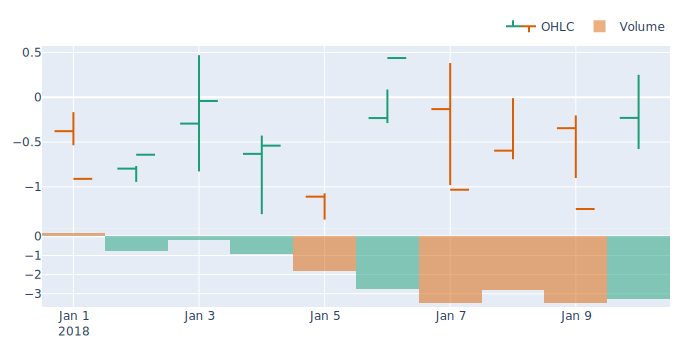

In [10]:
ohlcv_ts.vbt.ohlcv.plot().show_svg()